# Assignment: Used Car Price prediction

In this assignment, we are providing you the Used Car New Price dataset. The New Price is referenced via different features such as Year, Location, Brand, Model etc. The task is to predict New Price using Supervised Machine Learning alogorithms that has been learned so far. Built the model, submit the jupyter notebook and we will evaluate it.

**Independent Variables**

<br>`Location` - An identifier for each City
<br>`Year` - Calendar Year
<br>`Kilometers_Driven` - Odometer reading driven in Kilometers of a model
<br>`Fuel_Type` - Fuel Types of a model
<br>`Transmission` - Transmission type of a model
<br>`Owner_Type` - Owner Type of a model
<br>`Seats` - #of Seats of a model
<br>`mileage_num` - Mileage Number of a model
<br>`engine_num` - Engine Number of a model
<br>`power_num` - Power Number of a model
<br>`Brand` - Brand of a model
<br>`Model` - Model of a model
<br>`Price` - Price of a model

**Target Varible**

`New_Price` -  Predict New Price of a model

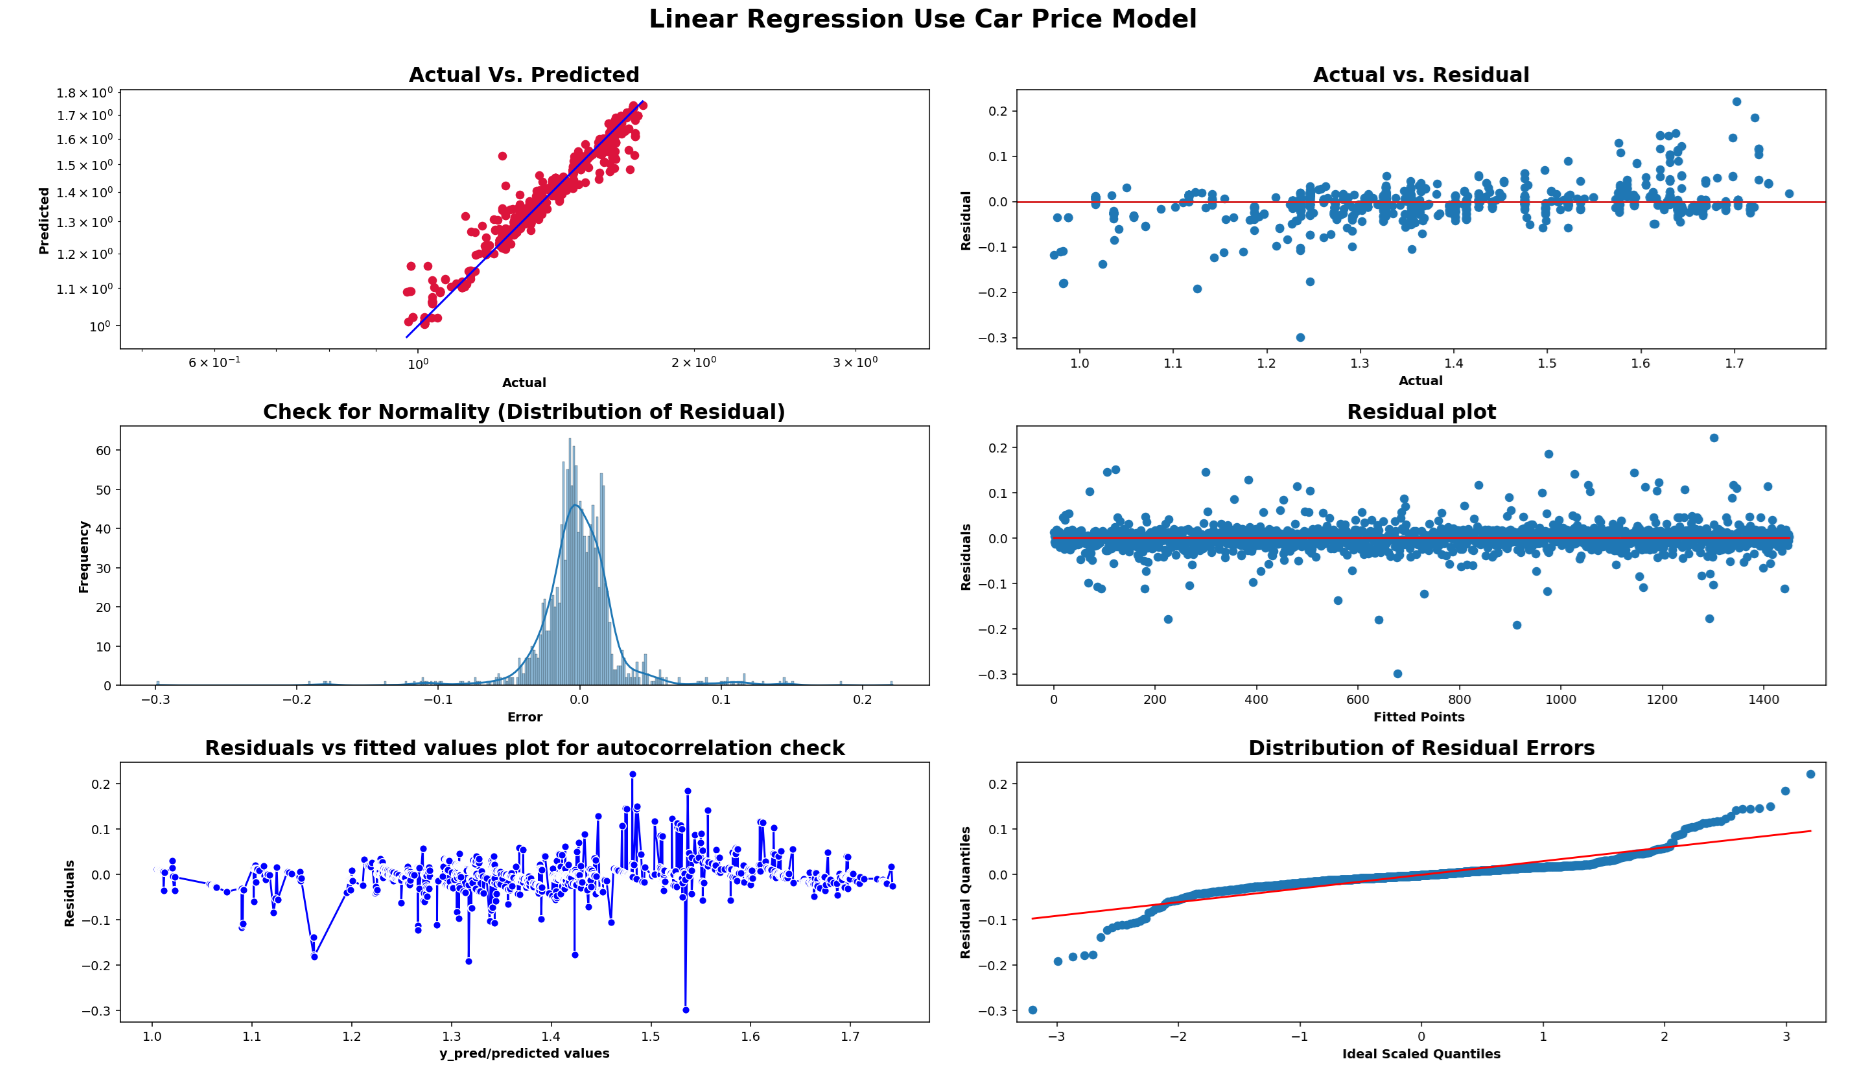

## Outline to model and predict 'Used Car New Price'
    
1. [Import Libraries](#1)
2. [Variable Identification and Typecasting](#2)
3. [Link for Jupyter Note on Used Car Price for EDA and Feature Engineering](#3)
4. [Feature Engineering](#4)
    <br>[4.1 Feature Generation - Binning](#4.1)
    <br>[4.1 Handle Missing Values](#4.2)
    <br>[4.2 Identify and Remove Outlier](#4.3)
    <br>[4.4 Encoding (Label Encoding, One-Hot Encoding, Target Encoding)](#4.4)
5. [Model Building](#5)
    <br>[5.1 Simple Mean (Mean of 'New_Price')](#5.1)
    <br>[5.2 Build Linear Regression Model (Sklear Linear Model)](#5.2)
    <br>[5.3 Check Assumptions for Linear Regression](#5.3)
    <br>[5.4 Build Linear Regression Model (statsmodels OLS Model)](#5.4)
    <br>[5.5 Check Assumptions for statsmodel OLS (Linear Regression)](#5.5)
    <br>[5.6 Build Support Vector Regression Model (SVM Regression)](#5.6)
    <br>[5.7 Build XGBoost Regression Model](#5.7)`


## 1. Import Libraries<a id='1'></a>

In [1]:
# Import necessary Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, \
OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE, r2_score

from category_encoders import BinaryEncoder, MEstimateEncoder

from scipy.stats import f_oneway
from scipy.stats import boxcox

import category_encoders as ce
import pickle
# import mlmachine as mlm

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print('Libraries imported')

Libraries imported


In [2]:
# Read used car data file and import as Pandas Dataframe

used_cars_df = pd.read_excel('Datasets/used_cars_data.xlsx')
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage_num,engine_num,power_num,Brand,Model,New_Price,Price,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,26.60,998.0,58.16,maruti,wagon,5.51,1.75,NaN,3.91,NaN
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,19.67,1582.0,126.20,hyundai,creta,16.06,12.50,NaN,NaN,11.0
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,18.20,1199.0,88.70,honda,jazz,8.61,4.50,NaN,NaN,27.0
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,20.77,1248.0,88.76,maruti,ertiga,11.27,6.00,NaN,3.75,40.0
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,audi,a4,53.14,17.74,NaN,NaN,61.0


## 2. Variable Identification and Typecasting<a id='2'></a>

In [3]:
# Check out Rows (Observations) and Columns (Features / Variables) of the dataset

used_cars_df.shape

(7252, 17)

In [4]:
# Review basic information of each column: datatypes, #of rows, null etc.

used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   mileage_num        7169 non-null   float64
 8   engine_num         7206 non-null   float64
 9   power_num          7077 non-null   float64
 10  Brand              7252 non-null   object 
 11  Model              7252 non-null   object 
 12  New_Price          7252 non-null   float64
 13  Price              6019 non-null   float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        2 non-null      float64
 16  Unnamed: 16        7 non

In [5]:
# Typecasting of variables into 'Category' for having categorical values

used_cars_df['Location']     = used_cars_df['Location'].astype('category')
used_cars_df['Year']     = used_cars_df['Year'].astype('category')
used_cars_df['Fuel_Type']    = used_cars_df['Fuel_Type'].astype('category')  
used_cars_df['Transmission'] = used_cars_df['Transmission'].astype('category') 
used_cars_df['Owner_Type']   = used_cars_df['Owner_Type'].astype('category') 
used_cars_df['Brand']        = used_cars_df['Brand'].astype('category') 
used_cars_df['Model']        = used_cars_df['Model'].astype('category')
used_cars_df['Seats']        = used_cars_df['Seats'].astype('category')

In [6]:
# Check datatypes of the variables after converting datatypes

used_cars_df.dtypes

Location             category
Year                 category
Kilometers_Driven     float64
Fuel_Type            category
Transmission         category
Owner_Type           category
Seats                category
mileage_num           float64
engine_num            float64
power_num             float64
Brand                category
Model                category
New_Price             float64
Price                 float64
Unnamed: 14           float64
Unnamed: 15           float64
Unnamed: 16           float64
dtype: object

In [7]:
# Create logical groups of variables : Numerical and categorical

# Numerical groups
num_features        = ['Kilometers_Driven', 'mileage_num', 'engine_num', 'power_num', 'New_Price','Price']
dist_features       = ['Kilometers_Driven', 'mileage_num']
engine_features     = ['engine_num', 'power_num']
price_features      = ['New_Price', 'Price']

# Categorical Groups
cat_features        = ['Location', 'Year', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 
                       'Model', 'NP_Category']
fuel_trans_type     = ['Fuel_Type', 'Transmission']
owner_seat_types    = ['Owner_Type', 'Seats']
brand_model_types   = [ 'Year', 'Brand', 'Model', 'NP_Category']

target              = ['New_Price']

### 3. Link for Jupyter Note on Used Car Price for EDA and Feature Engineering

**3.1 Find below Jupyter Notebook for Exploratory Data Analysis (EDA)**

[Exploratory Data Analysis (EDA)](./eda_used_car_price-annova.ipynb).

## 4. Feature Engineering<a id='4'></a>

**4.1 Find below Jupyter Notebook for Feature Engineering**

[Feature Engineering](./predict_used_car_price-feature-engineering.ipynb).

In [60]:
# Read the saved Dataframe from the above 'Featured Engineering Notebook'

used_cars_df = pd.read_csv('used_cars_df.csv')

In [61]:
used_cars_df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'mileage_num', 'engine_num', 'power_num',
       'Brand', 'Model', 'New_Price', 'Price', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'NP_Category', 'Seats_NA', 'mileage_num_NA',
       'engine_num_NA', 'power_num_NA', 'Kilometers_Driven_NA',
       'Kilometers_Driven_Log', 'mileage_num_log', 'engine_num_log',
       'power_num_log', 'New_Price_log', 'Kilometers_Driven_boxcox',
       'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox',
       'New_Price_boxcox'],
      dtype='object')

In [62]:
# Create Dependent and Independent Features

X = used_cars_df.drop(['mileage_num', 'engine_num', 'power_num', 'Kilometers_Driven', 'New_Price', 'Price', 
                       'Seats_NA', 'mileage_num_NA', 'engine_num_NA', 'power_num_NA', 'Kilometers_Driven_NA', 
                       'mileage_num_log', 'engine_num_log', 'power_num_log', 'Kilometers_Driven_Log', 'New_Price_log', 
                       'New_Price_boxcox', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1)

y = used_cars_df['New_Price_boxcox']

X.shape, y.shape

((7252, 13), (7252,))

In [63]:
used_cars_df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'mileage_num', 'engine_num', 'power_num',
       'Brand', 'Model', 'New_Price', 'Price', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'NP_Category', 'Seats_NA', 'mileage_num_NA',
       'engine_num_NA', 'power_num_NA', 'Kilometers_Driven_NA',
       'Kilometers_Driven_Log', 'mileage_num_log', 'engine_num_log',
       'power_num_log', 'New_Price_log', 'Kilometers_Driven_boxcox',
       'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox',
       'New_Price_boxcox'],
      dtype='object')

In [64]:
# Splitting dataset into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5801, 13), (5801,), (1451, 13), (1451,))

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5801 entries, 5811 to 5640
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  5801 non-null   object 
 1   Year                      5801 non-null   int64  
 2   Fuel_Type                 5801 non-null   object 
 3   Transmission              5801 non-null   object 
 4   Owner_Type                5801 non-null   object 
 5   Seats                     5801 non-null   float64
 6   Brand                     5801 non-null   object 
 7   Model                     5801 non-null   object 
 8   NP_Category               5801 non-null   object 
 9   Kilometers_Driven_boxcox  5801 non-null   float64
 10  mileage_num_boxcox        5801 non-null   float64
 11  engine_num_boxcox         5801 non-null   float64
 12  power_num_boxcox          5801 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 634.5+ KB


In [66]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 5801 entries, 5811 to 5640
Series name: New_Price_boxcox
Non-Null Count  Dtype  
--------------  -----  
5801 non-null   float64
dtypes: float64(1)
memory usage: 90.6 KB


In [67]:
# Numerical groups

num_features        = ['Kilometers_Driven_boxcox', 'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox']
dist_features       = ['Kilometers_Driven_boxcox', 'mileage_num_boxcox']
engine_features     = ['engine_num_boxcox', 'power_num_boxcox']

# Categorical Groups

cat_features        = ['Year', 'Location', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model', 
                       'NP_Category']
fuel_trans_type     = ['Fuel_Type', 'Transmission']
owner_seat_types    = ['Locaton', 'Owner_Type', 'Seats']
brand_model_types   = ['Year', 'Brand', 'Model', 'NP_Category']

In [68]:
for col in cat_features:
    print('unique values for ', col, ':', X[col].nunique())

unique values for  Year : 23
unique values for  Location : 11
unique values for  Seats : 8
unique values for  Fuel_Type : 5
unique values for  Transmission : 2
unique values for  Owner_Type : 4
unique values for  Brand : 32
unique values for  Model : 218
unique values for  NP_Category : 10


**Decide Type of Encoding to categorical features based on number of unique values per above**
-  'Fuel_Type', 'Transmission', 'Owner_Type', 'NP_Category' --> **Onehot Encoding**
- 'Seats', 'Owner_Type', 'NP_Category'                      --> **Ordinal Encoding**
- 'Location', 'Year', 'Brand', 'Model'                      --> **Target  Encoding**

In [69]:
# Define the columns for each type of encoding

numscal_cols = num_features
onehot_cols  = ['Fuel_Type', 'Transmission', 'Owner_Type']
ordinal_cols = ['Seats', 'Owner_Type', 'NP_Category']
target_cols  = ['Location', 'Year', 'Brand', 'Model']

cols         = numscal_cols + onehot_cols + ordinal_cols + target_cols
print(cols)

['Kilometers_Driven_boxcox', 'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Owner_Type', 'NP_Category', 'Location', 'Year', 'Brand', 'Model']


In [70]:
# List the names of the X_train categorical columns to utilize it to rename after transforming the dataframe

numscal_cols_transformed     = []
onehot_cols_transformed      = []
ordinal_cols_transformed     = []
target_cols_cols_transformed = []

for i, col in enumerate(numscal_cols):
    numscal_cols_transformed.append(col+'_'+str(i))

for i, col in enumerate(onehot_cols):
    j = 0
    for j in range(X_train[col].nunique()):
        onehot_cols_transformed.append(col+'trans_'+str(j))
        #print(col)

for i, col in enumerate(ordinal_cols):
    ordinal_cols_transformed.append(col+'_'+str(i))

for i, col in enumerate(target_cols):
    target_cols_cols_transformed.append(col+'_'+str(i))

transformed_cols = numscal_cols_transformed + onehot_cols_transformed + ordinal_cols_transformed + \
    target_cols_cols_transformed
print(transformed_cols)
print(len(transformed_cols))

['Kilometers_Driven_boxcox_0', 'mileage_num_boxcox_1', 'engine_num_boxcox_2', 'power_num_boxcox_3', 'Fuel_Typetrans_0', 'Fuel_Typetrans_1', 'Fuel_Typetrans_2', 'Fuel_Typetrans_3', 'Fuel_Typetrans_4', 'Transmissiontrans_0', 'Transmissiontrans_1', 'Owner_Typetrans_0', 'Owner_Typetrans_1', 'Owner_Typetrans_2', 'Owner_Typetrans_3', 'Seats_0', 'Owner_Type_1', 'NP_Category_2', 'Location_0', 'Year_1', 'Brand_2', 'Model_3']
22


In [71]:
# Create Column transformers for each categorical type for encoding

# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

# Initial transformers for the respective features

numscal_scaler  = StandardScaler()
onehot_encoder  = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()
target_encoder  = MEstimateEncoder(cols=['Location', 'Year', 'Brand', 'Model'], m=5.0)
model_regtree   = DecisionTreeRegressor(random_state=0)

# Create a ColumnTransformer to apply the encoders to the correct columns

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler',  numscal_scaler,  numscal_cols), 
        ('onehot',  onehot_encoder,  onehot_cols), 
        ('ordinal', ordinal_encoder, ordinal_cols), 
        ('target',  target_encoder,  target_cols)])

# Create a pipeline with the preprocessor

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ("model", model_regtree)])

X_train_transformed = pipeline.fit_transform(X_train, y_train)
X_test_transformed  = pipeline.transform(X_test)

# Convert the result back to a dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_cols)
X_test_transformed_df  = pd.DataFrame(X_test_transformed,  columns=transformed_cols)

In [72]:
X_train_transformed_df.head()

,Kilometers_Driven_boxcox_0,mileage_num_boxcox_1,engine_num_boxcox_2,power_num_boxcox_3,Fuel_Typetrans_0,Fuel_Typetrans_1,Fuel_Typetrans_2,Fuel_Typetrans_3,Fuel_Typetrans_4,Transmissiontrans_0,...,Owner_Typetrans_1,Owner_Typetrans_2,Owner_Typetrans_3,Seats_0,Owner_Type_1,NP_Category_2,Location_0,Year_1,Brand_2,Model_3
0,-0.562009,-1.447684,0.527290,1.111896,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,4.0,1.359367,1.384069,1.508432,1.559743
1,-0.739027,0.595357,0.822946,1.434670,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,5.0,1.388889,1.373640,1.647874,1.590579
2,1.006952,-0.334569,-0.341047,-0.451610,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,3.0,7.0,1.359367,1.333636,1.318896,1.343152
3,0.897126,-1.763423,1.909078,1.226923,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,1.408250,1.401578,1.493710,1.581968
4,-0.639711,1.139142,-1.269595,-1.044346,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,9.0,1.388889,1.373640,1.212975,1.160184


In [73]:
X_test_transformed_df.head()

,Kilometers_Driven_boxcox_0,mileage_num_boxcox_1,engine_num_boxcox_2,power_num_boxcox_3,Fuel_Typetrans_0,Fuel_Typetrans_1,Fuel_Typetrans_2,Fuel_Typetrans_3,Fuel_Typetrans_4,Transmissiontrans_0,...,Owner_Typetrans_1,Owner_Typetrans_2,Owner_Typetrans_3,Seats_0,Owner_Type_1,NP_Category_2,Location_0,Year_1,Brand_2,Model_3
0,1.038057,-0.247300,0.822946,0.926524,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.380552,1.389775,1.338519,1.394482
1,1.366773,0.563121,0.184321,0.114005,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.380552,1.401578,1.347161,1.394840
2,-1.735000,0.872581,-0.218952,-0.274108,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,7.0,1.403286,1.389775,1.318896,1.328210
3,-0.578255,0.344294,-0.081910,0.224807,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.413652,1.368889,1.338519,1.422363
4,-0.746094,0.249874,-0.691533,-0.550326,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,7.0,1.388889,1.384069,1.318896,1.328854


In [74]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kilometers_Driven_boxcox_0  5801 non-null   float64
 1   mileage_num_boxcox_1        5801 non-null   float64
 2   engine_num_boxcox_2         5801 non-null   float64
 3   power_num_boxcox_3          5801 non-null   float64
 4   Fuel_Typetrans_0            5801 non-null   float64
 5   Fuel_Typetrans_1            5801 non-null   float64
 6   Fuel_Typetrans_2            5801 non-null   float64
 7   Fuel_Typetrans_3            5801 non-null   float64
 8   Fuel_Typetrans_4            5801 non-null   float64
 9   Transmissiontrans_0         5801 non-null   float64
 10  Transmissiontrans_1         5801 non-null   float64
 11  Owner_Typetrans_0           5801 non-null   float64
 12  Owner_Typetrans_1           5801 non-null   float64
 13  Owner_Typetrans_2           5801 

### 5 Model Building<a id='5'></a>

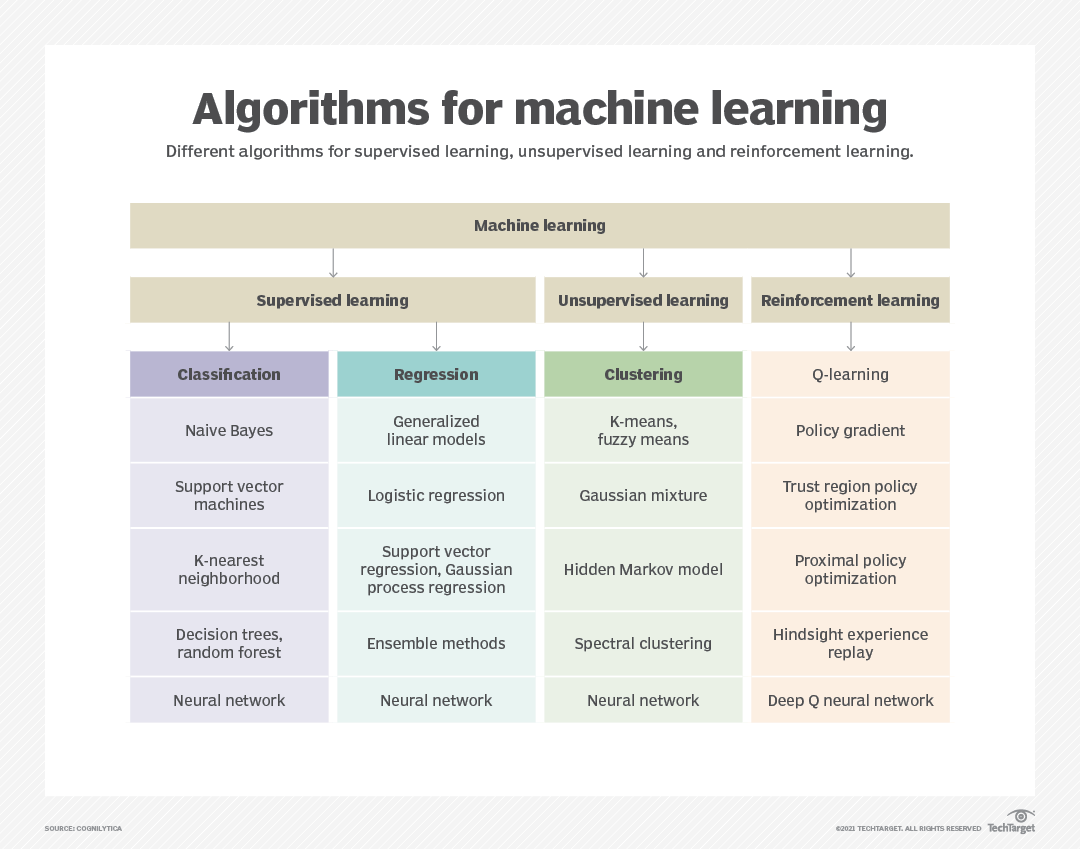

Ref: https://www.techtarget.com/searchenterpriseai/feature/How-to-build-a-machine-learning-model-in-7-steps

**Determine the model's features and train it**

Once the data is in usable shape and you know the problem you're trying to solve, it's time to train the model to learn from the quality data by applying a range of techniques and algorithms. This phase requires selecting and applying model techniques and algorithms; setting and adjusting hyperparameters; training and validating the model; developing and testing ensemble models, if needed; and optimizing the model.

To accomplish all that, this stage often includes the following actions:

Select the right algorithm for your learning objective and data requirements. For example, linear regression is a popular option for mapping correlations between two variables in a data set.
Configure and tune hyperparameters for optimal performance and determine a method of iteration such as learning rate to attain the best hyperparameters.
Identify features that provide the best results.
Determine whether model explainability or interpretability is required.
Develop ensemble models for improved performance.
Compare the performance of different model versions.
Identify requirements for the model's operation and deployment.
Evaluate the resulting model to determine whether it meets the business and operational requirements.

Evaluate the model's performance and establish benchmarks
Evaluating a model's performance encompasses confusion matrix calculations, business KPIs, machine learning metrics, model quality measurements and a final determination of whether the model can meet the established business goals.

During the model evaluation process, perform the following assessments:

Evaluate the model using a validation data set.
Determine confusion matrix values for classification problems.
Identify methods for K-fold cross-validation, if using that approach.
Further tune hyperparameters for optimal performance.
Compare the machine learning model to the baseline model or heuristic.
Consider model evaluation to be the quality assurance of machine learning. Adequately evaluating model performance against metrics and requirements helps you understand how the model will work in the real world.

### 5.1 Simple Mean ( mean of 'New_Price')<a id='5.1'></a>

In [75]:
# storing simple mean in a new y dataset column in the test set as "simple_mean"

NP_mean      = y_train.mean()
y_train_mean = y_train.copy()
y_train_mean = pd.DataFrame(y_train_mean)
y_train_mean.columns = ['New_Price']
y_train_mean['NP_mean'] = NP_mean

y_train_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5801 entries, 5811 to 5640
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   New_Price  5801 non-null   float64
 1   NP_mean    5801 non-null   float64
dtypes: float64(2)
memory usage: 136.0 KB


In [76]:
#calculating mean absolute error

# simple_mean_error = MAE(y_train_mean['New_Price'] , y_train_mean['NP_mean'])
# simple_mean_error

mse= MSE(y_train_mean['New_Price'],y_train_mean['NP_mean'])
r2= r2_score(y_train_mean['New_Price'],y_train_mean['NP_mean'])
print(f"Mean Squared Error:{mse:.2f}")
print(f"R_squared:{r2:.2%}")

Mean Squared Error:0.03
R_squared:0.00%


### 5.2 Build Linear Regression Model (Sklear Linear Model)<a id='5.2'></a>

In [77]:
# Import LinearRegression and instantiate LR Model

from sklearn.linear_model import LinearRegression

# Create a linear regression model
LR_model= LinearRegression()

# Train the model on the training data: 
LR_model.fit(X_train_transformed_df, y_train)

LinearRegression()

**`Make predictions using both Train and the Test features and Compute Reisidual`**

In [78]:
# Predicting over the Train Set and calculating error
y_train_predict = LR_model.predict(X_train_transformed_df)
mse_train = MSE(y_train, y_train_predict)
r2_train= r2_score(y_train, y_train_predict)

# Predicting over the Test Set and calculating error
y_test_predict = LR_model.predict(X_test_transformed_df)
mse_test       = MSE(y_test, y_test_predict)
r2             = r2_score(y_test, y_test_predict)

# Compute the Residuals
residual = y_test - y_test_predict

**Evaluate the model**

**`Mean Squared Error(MSE)`** is a common mathematical metric used in statics and machine learning to measure the average squared difference between preicted values and actual values. it is particularly useful for evaluating the accuracy and performance of regresion models. Hee I will explain the concept of MSE step by step

**`R-squared (R²)`** is a statistical measure used in regression analysis to evaluate the goodness of fit of a model. It helps us understand how well the independent variables in a regression model explain the variation in the dependent variable. R-squared is often used in fields such as economics, finance, and social sciences, but it can be applied in a wide range of disciplines. Here's a step-by-step explanation of what R-squared is and how it is calculated:

In [79]:
# Print the MSE and R Square for Train and Test

print(f"Mean Squared Error (Train):{mse_train:.6f}")
print(f"R² (Train):{r2_train:.2%}")
print(f"\nMean Squared Error (Test):{mse_test:.6f}")
print(f"R² (Test):{r2:.2%}")

Mean Squared Error (Train):0.000805
R² (Train):97.23%

Mean Squared Error (Test):0.000911
R² (Test):96.88%


**`Plot Linear Regression Distribution`** 

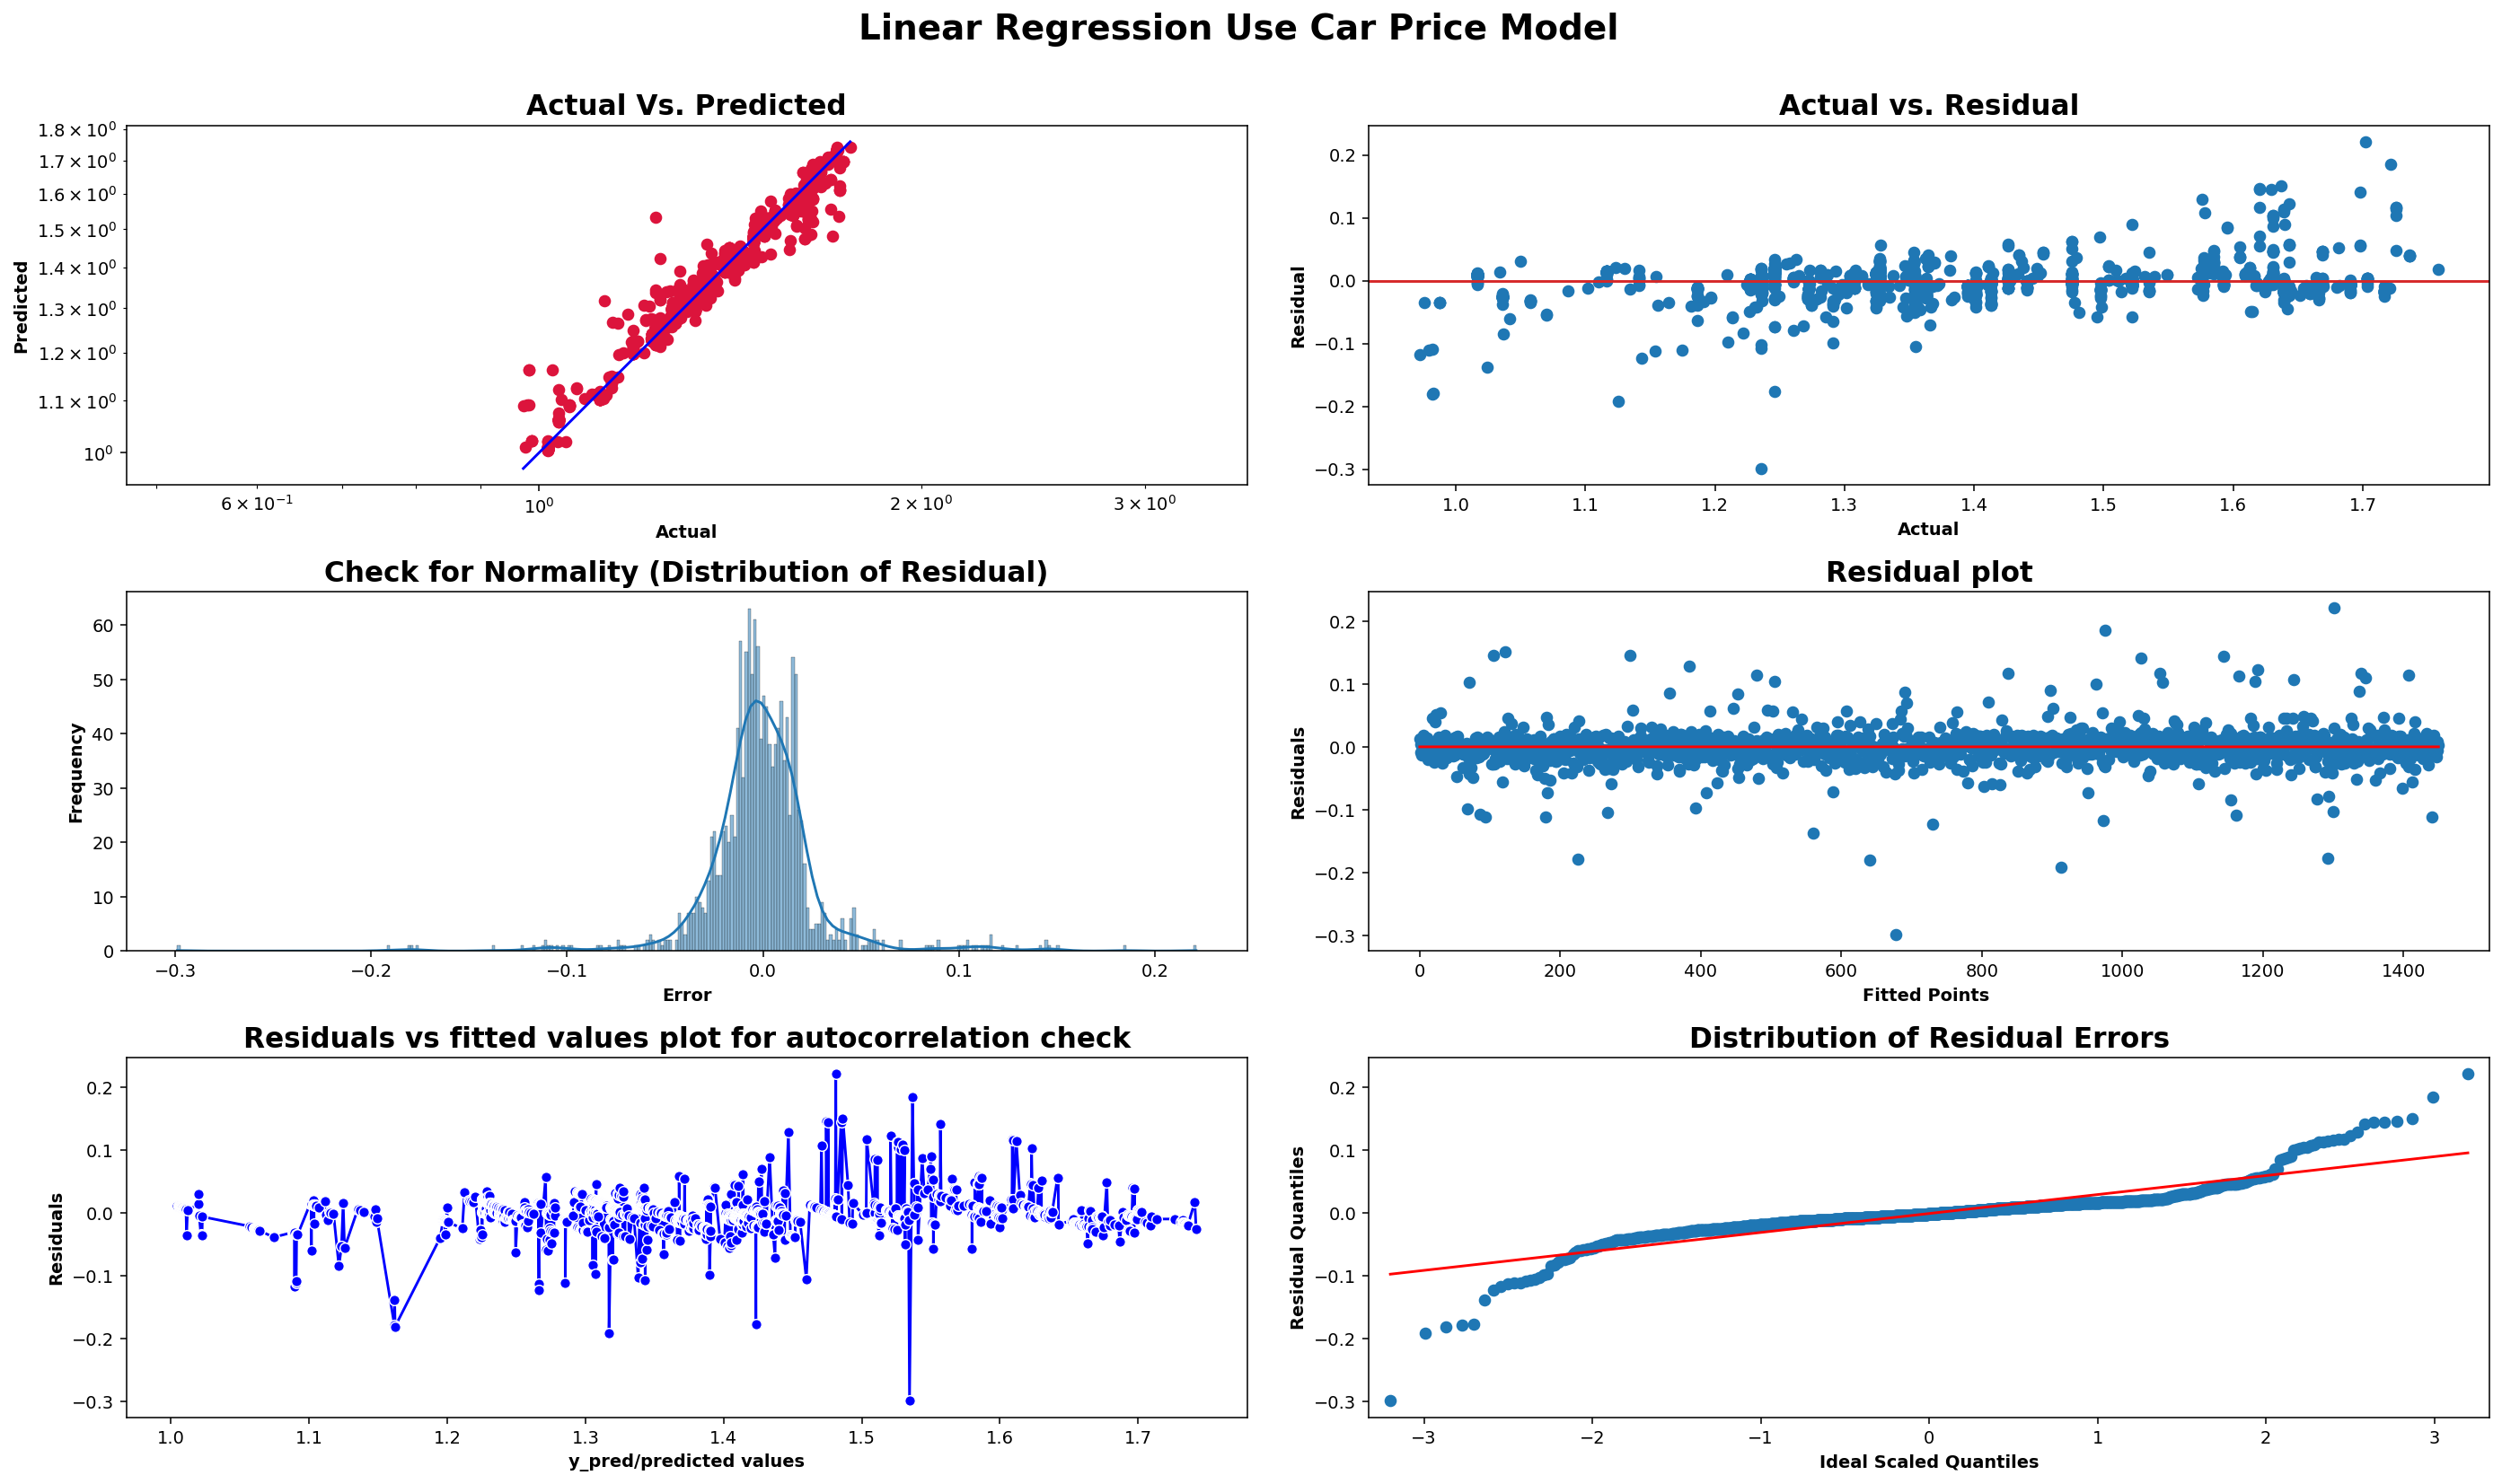

In [80]:
# Calculate the Linear Regression Assumptions and Plot the Distribution

y_pred_transformed = LR_model.predict(X_test_transformed_df)

# Plot the Linear Model Regression Statistics 

fig, ax = plt.subplots(3, 2, figsize = (20,12), dpi = 140)
fig.suptitle('Linear Regression Use Car Price Model  \n', fontweight = 'bold', fontsize=20)

# Plot Actual Vs Predicted
ax[0,0].scatter(y_test, y_test_predict, c='crimson')
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')

p1 = max(max(y_test_predict), max(y_test))
p2 = min(min(y_test_predict), min(y_test))

ax[0,0].plot([p1, p2], [p1, p2], 'b-')
ax[0,0].set_xlabel('Actual', fontweight = 'bold')
ax[0,0].set_ylabel('Predicted', fontweight = 'bold')
ax[0,0].axis('equal')
ax[0,0].set_title("Actual Vs. Predicted", fontweight = 'bold', fontsize=16)

# Plot Actual Vs. Residual
ax[0,1].scatter(y_test, residual)
ax[0,1].set_xlabel('Actual', fontweight = 'bold')
ax[0,1].set_ylabel('Residual', fontweight = 'bold')
ax[0,1].set_title("Actual vs. Residual", fontweight = 'bold', fontsize=16)
ax[0,1].axhline(0, color="#d62728")

# Plot Distribution of Residual
sns.histplot(residual, bins = 350, fill = True, kde = True, ax = ax[1,0])
ax[1, 0].set_title("Check for Normality (Distribution of Residual)", fontweight = 'bold', fontsize=16)
ax[1, 0].set_ylabel("Frequency", fontweight = 'bold')
ax[1, 0].set_xlabel("Error", fontweight = 'bold')

# Residual Plot
c = residual.shape
f = range(0,1451)
k = [0 for i in f]
ax[1, 1].scatter(f, residual[:], label = 'residuals')
ax[1, 1].plot( f, k , color = 'red', label = 'regression line' )
ax[1, 1].set_xlabel('Fitted Points ', fontweight = 'bold')
ax[1, 1].set_ylabel('Residuals', fontweight = 'bold')
ax[1, 1].set_title("Residual plot", fontweight = 'bold', fontsize=16)

# Plot Actual vs. Residual Lineplot
p = sns.lineplot(x = y_test_predict, y = residual, marker='o',color='blue', ax = ax[2, 0])
ax[2, 0].set_xlabel('y_pred/predicted values', fontweight = 'bold')
ax[2, 0].set_ylabel('Residuals', fontweight = 'bold')
ax[2, 0].set_title('Residuals vs fitted values plot for autocorrelation check', fontweight = 'bold', fontsize=16)   

## Plotting the QQ plot
qqplot(residual[:], line = 's' , ax = ax[2,1])
ax[2, 1].set_ylabel('Residual Quantiles', fontweight = 'bold')
ax[2, 1].set_xlabel('Ideal Scaled Quantiles', fontweight = 'bold')
ax[2, 1].set_title("Distribution of Residual Errors", fontweight = 'bold', fontsize=16)

plt.tight_layout()
plt.show()

### 5.3 Check Assumptions for Linear Regression<a id='5.3'></a>

<br>**`1. Linearity:`** Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the New Price variable
<br>**`2. Mean of Residuals:`**
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.
<br>**`3. Check for Homoscedasticity:`**
The homoscedasticity assumption, also known as the homogeneity of variances assumption, states that the variances of different groups being compared are equal or similar. It's a key assumption in parametric statistical tests and linear regression models because uneven variances can lead to biased and skewed results.
<br>**`4. Check for Normaity:`**
The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data. (See above graph)
<br>**`5. Check for No Autocorrelation of Residual:`**
Autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. 
There should not be autocorrelation in the data so the error terms should not form any pattern. (See above graph)

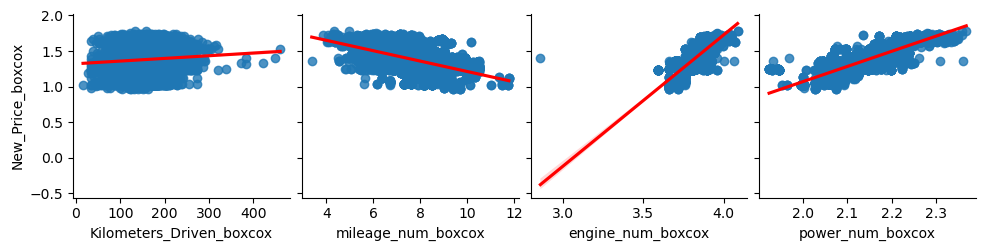

In [81]:
# 1. Linearity: visualize the relationship between the numerical features and the target feature

sns.pairplot(used_cars_df, x_vars=num_features, y_vars='New_Price_boxcox', 
             kind="reg", plot_kws={"line_kws": {"color": "red"}})

plt.show()

**`Inference: The above distribution visually reveals the linear relationship exists between 'Use Car Price' Numerical Features and Target Feature 'New Price'.`**

In [82]:
# 2. Mean of Residuals

mean_residuals = np.mean(residual)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.0007514019201982874


**`The mean of Residual is very close to zero; so all good here.`**

**3. Checking heteroscedasticity : Goldfeld Quandt test for heteroscedasticity.**
<br>`Null Hypothesis       : Error terms are homoscedastic`
<br>`Alternative Hypothesis: Error terms are heteroscedastic.`

In [83]:
# 3. Goldfeld Quandt Test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sm.stats.diagnostic.het_goldfeldquandt(residual, X_test_transformed_df)
lzip(name, test)

[('F statistic', 1.042311996144095), ('p-value', 0.29081967190922714)]

**`Inference: Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject Null Hypothesis. Error terms are homoscedastic. Good.`** 

### 5.4 Build Linear Regression Model (statsmodels Linear Model)<a id='5.4'></a>

In [84]:
X_train_transformed_df.shape, y_train.shape, X_test_transformed_df.shape, y_test.shape

((5801, 22), (5801,), (1451, 22), (1451,))

In [85]:
print(transformed_cols)

['Kilometers_Driven_boxcox_0', 'mileage_num_boxcox_1', 'engine_num_boxcox_2', 'power_num_boxcox_3', 'Fuel_Typetrans_0', 'Fuel_Typetrans_1', 'Fuel_Typetrans_2', 'Fuel_Typetrans_3', 'Fuel_Typetrans_4', 'Transmissiontrans_0', 'Transmissiontrans_1', 'Owner_Typetrans_0', 'Owner_Typetrans_1', 'Owner_Typetrans_2', 'Owner_Typetrans_3', 'Seats_0', 'Owner_Type_1', 'NP_Category_2', 'Location_0', 'Year_1', 'Brand_2', 'Model_3']


In [86]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels

# first artificially add intercept to X

X_train_transformed_ols_df = sm.add_constant(X_train_transformed_df)
OLS_model = sm.OLS(y_train, X_train_transformed_df.values)
OLS_model = OLS_model.fit()

# Stats Model Summary

print(OLS_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       New_Price_boxcox   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:48:36   Log-Likelihood:                 12435.
No. Observations:                5801   AIC:                        -2.483e+04
Df Residuals:                    5782   BIC:                        -2.471e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0012      0.000     -2.892      0.004      -0.002      -0.000
x2             0.0007      0.001      0.969      0.332      -0.001       0.002
x3             0.0128      0.001     10.278      0.000       0.010       0.015
x4             0.0032      0.001      3.112      0.002       0.001       0.005
x5            -0.0186      0.009     -2.107      0.035      -0.036      -0.001
x6            -0.0191      0.008     -2.337      0.019      -0.035      -0.003
x7             0.1331      0.027      4.964      0.000       0.081       0.186
x8            -0.0170      0.011     -1.572      0.116      -0.038       0.004
x9            -0.0204      0.008     -2.586      0.010      -0.036      -0.005
x10            0.0348      0.014      2.443      0.015       0.007       0.063
x11            0.0232      0.014      1.636      0.102      -0.005       0.051
x12            0.0304      0.018      1.702      0.089      -0.005       0.065
x13            0.0331      0.013      2.600      0.009       0.008       0.058
x14            0.0038      0.004      0.912      0.362      -0.004       0.012
x15           -0.0094      0.004     -2.321      0.020      -0.017      -0.001
x16           -0.0088      0.001    -14.253      0.000      -0.010      -0.008
x17            0.0127      0.007      1.803      0.071      -0.001       0.026
x18           -0.0029      0.000    -17.196      0.000      -0.003      -0.003
x19            0.0081      0.013      0.629      0.529      -0.017       0.033
x20           -0.0229      0.023     -0.985      0.325      -0.068       0.023
x21            0.1377      0.006     24.948      0.000       0.127       0.148
x22            0.8776      0.006    136.963      0.000       0.865       0.890
==============================================================================
Omnibus:                     2189.321   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153120.486
Skew:                          -0.945   Prob(JB):                         0.00
Kurtosis:                      28.098   Cond. No.                     6.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**`Make predictions using both Train and the Test data and Compute Reisidual`**

In [87]:
# Predicting over the Train Set and calculating error
y_train_ols_pred = OLS_model.predict(X_train_transformed_df.values)
mse_train_ols = MSE(y_train, y_train_ols_pred)
r2_train_ols  = r2_score(y_train, y_train_ols_pred)

# Predicting over the Test Set and calculating error
y_test_ols_pred  = OLS_model.predict(X_test_transformed_df.values)
mse_test_ols = MSE(y_test, y_test_ols_pred)
r2_test_ols      = r2_score(y_test, y_test_ols_pred)

# Compute the Residuals
residual_ols = y_test - y_test_ols_pred

In [88]:
# Print the MSE and R Square for Train and Test

print(f"Mean Squared Error (Train):{mse_train_ols:.6f}")
print(f"R² (Train):{r2_train_ols:.2%}")
print(f"\nMean Squared Error (Test):{mse_test_ols:.6f}")
print(f"R² (Test):{r2_test_ols:.2%}")

Mean Squared Error (Train):0.000805
R² (Train):97.23%

Mean Squared Error (Test):0.000911
R² (Test):96.88%


### 5.5 Check Assumptions for statsmodel OLS (Linear Regression)<a id='5.5'></a>

**`1. Linearity: Scatterplots:`**
Plot each independent variable against the dependent variable to visually check for a linear relationship.
Residuals vs. Fitted Values Plot:
Plot the residuals against the predicted values. If the relationship is linear, the points should be randomly scattered around the horizontal axis with no discernible pattern.

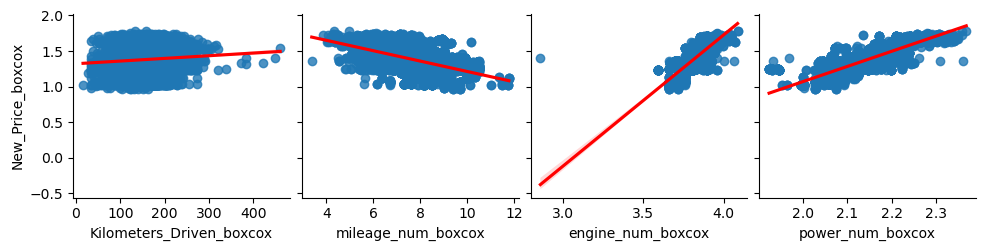

In [89]:
# 1. Linearity: visualize the relationship between the numerical features and the target feature

sns.pairplot(used_cars_df, x_vars=num_features, y_vars='New_Price_boxcox', 
             kind="reg", plot_kws={"line_kws": {"color": "red"}})

plt.show()

**`2. Homoscedasticity (Constant Variance):`**

Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
<br>`Null Hypothesis:` Error terms are homoscedastic
<br>`Alternative Hypothesis:` Error terms are heteroscedastic.

In [90]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual_ols, X_test_transformed_df)
lzip(name, test)

[('F statistic', 1.0423119961440945), ('p-value', 0.2908196719092362)]

**`Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.`**

**`3. Normality of Residuals:`**
Histogram of Residuals: Check if the distribution of residuals resembles a normal distribution.
Q-Q Plot: Plot the quantiles of the residuals against the quantiles of a normal distribution. If the points lie close to a 45-degree line, it indicates normality.

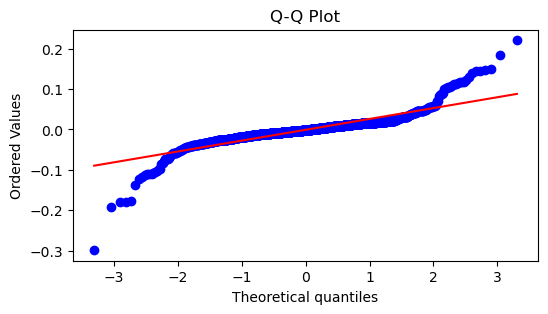

In [91]:
import scipy.stats as stats

fig = plt.figure(figsize=(6,3))
stats.probplot(residual_ols, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

**`4. Independence of Observations:`**
This assumption depends on the data collection process. Ensure that observations are not influenced by each other.
Durbin-Watson Test (for time series data):

In [92]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residual_ols)
print(dw_test)

1.9597291548468307


**`Values close to 2 indicate no autocorrelation.`**

**`5. No Multicollinearity:`**
Correlation Matrix: Check for high correlations (e.g., > 0.8) between independent variables.
Variance Inflation Factor (VIF):

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train_transformed_ols_df.values, i) for i in range(X_train_transformed_ols_df.shape[1])]
print(vif)

[0.0, 1.3056239272952865, 3.629529225750478, 11.167347113045796, 7.74333291008694, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1.7275772876512339, inf, 1.7661395575614287, 1.0715291466503645, 1.0544401253757465, 4.42190119973636, 6.726073037981294]


**`VIF values greater than 5 or 10 indicate potential multicollinearity issues.`**

### 5.6 Build Support Vector Regression Model (SVM Regression)<a id='5.6'></a>

**`Optimizing with Exhaustive Grid Search`**

A frequent obstacle with putting together machine learning models is how to tweak them to be just right. ML algorithms can always be tweaked to alter their behaviour. A good example of this is the regularization parameter C in an SVM model. Higher values of C incentivize the model to fit the training data more tightly, but lead to overfitting if you make it too high (the noisier the data, the worse it gets).

Lower values are more tolerant to noisy data and make the SVM favour a simpler decision boundary, which may cause your model to generalize better to data it hasn’t seen before. Of course, there’s a catch. If C is too low, your model could underfit, and not perform well on the training set or the test set.

There are a few important parameters of SVM that you should be aware of before proceeding further:
<br>**`Kernel:`** A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Usually, the computational cost will increase if the dimension of the data increases. This increase in dimension is required when we are unable to find a separating hyperplane in a given dimension and are required to move in a higher dimension.
<br>**`Hyperplane:`** This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output
<br>**`Decision Boundary:`** A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well


FScikit-learn comes with a way to check model performance with different hyper-parameters, called **`GridSearchCV`**. It’s an exhaustive grid search algorithm, which means that it tries all combinations

Ref: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

**Support Vector Machine for Regression**
<br>**`kernel:`** The type of kernel used when projecting the data into a higher-dimensional space where it ideally becomes linearly separable
<br>**`tolerance:`** The tolerance for stopping criterion
<br>**`C:`** The “strictness” of the SVR (i.e., to what degree the SVR is allowed to make mistakes when fitting the data)
<br>**`GridSearchCV:`** scikit-learn’s implementation of the grid search hyperparameter tuning algorithm
<br>**`RepeatedKFold:`** Performs k-fold cross-validation a total of N times using different randomization at each iteration
<br>**`estimator:`** The model we’re attempting to optimize (i.e., our SVR that will predict the age of the abalone)
<br>**`param_grid:`** The hyperparameter search space
<br>**`n_jobs:`** The number of cores on your processor(s) that will be used to run parallel jobs. A value of -1 implies that all cores/processors will be used, thereby speeding the grid search process.
<br>**`scoring:`** The loss function we’re attempting to optimize; in this case, we are trying to drive down our mean squared error (MSE), implying that the lower the MSE, the better our model is at predicting the age of the abalone


In [94]:
# initialize model and define the space of the hyperparameters to
# perform the grid-search over

from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model_svr = SVR()
kernel    = ["linear", "rbf", "sigmoid", "poly"]
tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
C         = [1, 1.5, 2, 2.5, 3]
grid      = dict(kernel=kernel, tol=tolerance, C=C)

# initialize a cross-validation fold and perform a grid-search to
# tune the hyperparameters

print("[INFO] grid searching over the hyperparameters...")
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
gridSearch = GridSearchCV(estimator = model_svr, param_grid=grid, n_jobs=-1, cv=cvFold, scoring="neg_mean_squared_error")

searchResults = gridSearch.fit(X_train_transformed_df, y_train)

# extract the best model and evaluate it

print("[INFO] evaluating...")
bestModel = searchResults.best_estimator_

y_pred_svr = bestModel.predict(X_test_transformed_df)
print("[INFO] Predicted Test values...")

[INFO] grid searching over the hyperparameters...
[INFO] evaluating...
[INFO] Predicted Test values...


In [95]:
# Print the MSE and R Square for Test Features

mse_test_svr = MSE(y_test, y_pred_svr)
print(f"SVR Mean Squared Error (Test):{mse_test_svr:.6f}")
print("SVR R² (Test): {:.2%}".format(bestModel.score(X_test_transformed_df, y_test)))

SVR Mean Squared Error (Test):0.001632
SVR R² (Test): 94.40%


### 5.7 Build XGBoost Regression Model<a id='5.7'></a>

XGBoost is a machine learning algorithm that belongs to the ensemble learning category, specifically the gradient boosting framework. It utilizes decision trees as base learners and employs regularization techniques to enhance model generalization. XGBoost is famous for its computational efficiency, offering efficient processing, insightful feature importance analysis, and seamless handling of missing values. It’s the go-to algorithm for a wide range of tasks, including regression, classification, and ranking.

XGBoost, or eXtreme Gradient Boosting, is a XGBoost algorithm in machine learning algorithm under ensemble learning. It is trendy for supervised learning tasks, such as regression and classification. XGBoost builds a predictive model by combining the predictions of multiple individual models, often decision trees, in an iterative manner.

The algorithm works by sequentially adding weak learners to the ensemble, with each new learner focusing on correcting the errors made by the existing ones. It uses a gradient descent optimization technique to minimize a predefined loss function during training.

Key features of XGBoost Algorithm include its ability to handle complex relationships in data, regularization techniques to prevent overfitting and incorporation of parallel processing for efficient computation.

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms. Bagging and boosting are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.

Let’s briefly discuss bagging before taking a more detailed look at the concept of gradient boosting.

<br>**`Bagging`**
While decision trees are one of the most easily interpretable models, they exhibit highly variable behavior. Consider a single training dataset that we randomly split into two parts. Now, let’s use each part to train a decision tree in order to obtain two models.

When we fit both these models, they would yield different results. Decision trees are said to be associated with high variance due to this behavior. Bagging or boosting aggregation helps to reduce the variance in any learner. Several decision trees which are generated in parallel, form the base learners of bagging technique. Data sampled with replacement is fed to these learners for training. The final prediction is the averaged output from all the learners.

<br>**`Boosting`**
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

Ref: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/#:~:text=It%20utilizes%20decision%20trees%20as,seamless%20handling%20of%20missing%20values.

**`Default parameters`**
max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

**`Explanation of relevant parameters for this kernel.`**
<br>booster: Select the type of model to run at each iteration
<br>gbtree: tree-based models
<br>gblinear: linear models
<br>nthread: default to maximum number of threads available if not set
<br>nthread: default to maximum number of threads available if not set
<br>objective: This defines the loss function to be minimized

**`Parameters for controlling speed`**
<br>subsample: Denotes the fraction of observations to be randomly samples for each tree
<br>colsample_bytree: Subsample ratio of columns when constructing each tree.
<br>n_estimators: Number of trees to fit.

**`Important parameters which control overfiting`**
<br>learning_rate: Makes the model more robust by shrinking the weights on each step
<br>max_depth: The maximum depth of a tree.
<br>min_child_weight: Defines the minimum sum of weights of all observations required in a child.

In [96]:
#Importing Packages

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

Tuning the hyper-parameters
GridSearchCV params:

<br>`estimator:` estimator object
<br>`param_grid:` dict or list of dictionaries
<br>`scoring:` A single string or a callable to evaluate the predictions on the test set. If None, the estimator’s score method is used.
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
<br>`n_jobs:` Number of jobs to run in parallel. None means. -1 means using all processors.
<br>`cv:` cross-validation, None, to use the default 3-fold cross validation. Integer, to specify the number of folds in a (Stratified)KFold.

In [97]:
#XGBoost hyper-parameter tuning

#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [98]:
best_param = hyperParameterTuning(X_train_transformed_df, y_train)
best_param

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [99]:
xgb_model = XGBRegressor(
    colsample_bytree= 0.7,
    learning_rate= 0.1,
    max_depth= 5, 
    min_child_weight= 1, 
    n_estimators= 500, 
    objective= 'reg:squarederror', 
    subsample= 0.7)

%time xgb_model.fit(X_train_transformed_df, y_train, eval_set=[(X_test_transformed_df, y_test)], verbose=False)

CPU times: total: 11.8 s
Wall time: 2.02 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
y_pred_xgb  = xgb_model.predict(X_test_transformed_df)

mse_xgb     = MSE(y_test, y_pred_xgb)
r2_test_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nMean Squared Error (Test):{mse_xgb:.6f}")
print(f"R² (Test):{r2_test_xgb:.2%}")


Mean Squared Error (Test):0.000098
R² (Test):99.66%


Random Forest, KNN, Adaboosting , Bagging Regressor, 

Feature Selection: p-Values Optimization for OLS, Feature Selection based on p-values;

Perform PCA: 

In [ ]:
# Save the model to a file

filename = 'transform_test.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Load the test data
valid_data = pd.read_csv('Datasets/used_cars_data_valid.csv')
valid_data.info()

In [ ]:
valid_data.info()

In [ ]:
valid_data.shape

In [ ]:
#Load the model from the file

with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# # Use the loaded model to make predictions
model_features  = loaded_model.feature_names_in_
model_features

In [ ]:
valid_data_transformed = loaded_model.(valid_data)